# Collaborators 

### Problem 1: Zed Hoffman-Weldon

### Problem 3: Zed Hoffman-Weldon, Kerryn van Rooyen


**General tips for computing and plotting discrete fourier transforms (DFT)**

- Let g(t) be some time signal that’s sampled at $dt$ to get a discrete array/list `g = [ … ]`
- You don’t need to code your own DFT, use numpy:  `A = numpy.fft.fft(g) * dt`
- You should also use `numpy.fft.fftshift( A )` to shift the fft output such that the 0-frequency component is centered (see why here https://docs.scipy.org/doc/numpy/reference/routines.fft.html#background-information) which you probably want when plotting
- You can use `f_axis = numpy.fft.fftshift( numpy.fft.fftfreq(len(g), dt) )` to create the frequency axis for plotting the shifted spectrum
- Keep in mind the fft output is in general complex, so to compare two fourier transforms (e.g. DFT vs CFT) you should compare either the real and imaginary parts ($z = x + i y$), or the phase and amplitude ($z = r e^{i\theta}$ ). Amplitude plots are most useful for this lab, show all 4 aspects though if you want.
- Note numpy fft assumes the time signal starts at $t = 0$, if yours doesn’t you should center it at zero. If you don’t then the complex components (x and y, or phase) will be off, but the amplitude should not change (why? analytically, recall that axis shifts in either domain are equivalent to complex exponential scaling, which has amplitude 1, in the other domain).
- If your time signal g is centered at zero, a hack to ‘rotate it’ to start at zero (and then take the fft and fftshift that) is to do: `fftshift( fft( ifftshift(g) ) )` (you may see mention of this online)

# Fourier transform of Gaussian Functions (6 pts)

A common function used for the convolution of time series data is the Gaussian function

$$  g(t) = \frac{1}{\sqrt{\pi} t_H} e^{-(t/t_H)^2}, $$

where $t_H$ is the half duration.

 1. Plot $g(t)$ for $t_H = 5$ and $t_H = 15$ sec on the same graph with domain $[-50, 50]$ and $dt=10^{-3}$.
 2. The analytical formula for the Fourier transform of $g(t)$ is

    $$ G(\omega) = e^\frac{-\omega^2 t_H^2}{4}. $$

    Compute the discrete Fourier transform (DFT) for both sampled $g(t)$
    time series, and compare them to the analytical $G(\omega)$
    for both $t_H$'s on the same graph.

    __Hints__: 
    - As numpy fft assumes signal starts from time 0, you can
    use the shift property of Fourier transform to first shift the $g(t)$
    to start from zero, and after `fftshift(fft())` operations, multiply
    the spectrum by complex exponential sinusoid function.
    - You need to sample the theoretical curve $G(w)$ with `w_axis = 2*pi*f_axis`, or else rewrite it as $G(f=\frac{w}{2\pi})$ if you'd rather sample it with `f_axis`
    - As a guide (so you can be confident of your fft utilization for the remainder of the lab), we expect that the amplitudes (use `numpy.abs(…)`) of the discrete FT and the continuous FT essentially match. The phase won’t necessarily match.
 3. Comment on the effect of filtering a general input time function $f(t)$ by $g(t)$
    (i.e. convolution of $f(t)$ with $g(t)$), and explain the difference in filtered output
    after applying Gaussian functions with $t_H = 5$ or $15$ secs.
 4. Comment on how this is related to the time-frequency uncertainty principle (a signal cannot
    be infinitesimally sharp both in time and frequency).

# 1 solution

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt

# functions
def g_t_anal(t,t_h):
    
    gt = np.exp(-1*(t/t_h)**2) * 1/(t_h*np.sqrt(np.pi))
    
    return gt


def g_w_anal(t,t_h):
    w = 2*np.pi*t
    return np.exp(-1 * (w*t_h/2)**2)



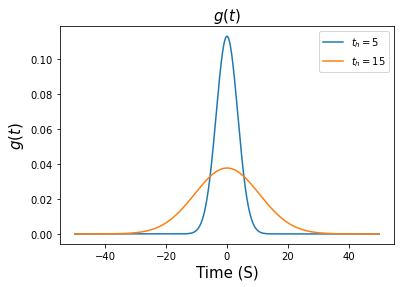

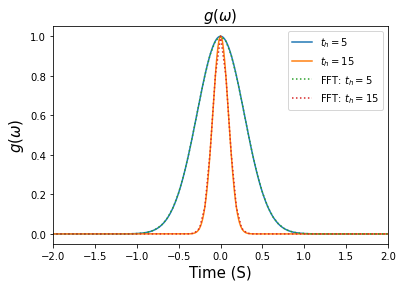

In [2]:
# plots
dt = 1e-3
t = np.arange(-50,50, dt)

t_h = 5
plt.plot(t, g_t_anal(t,t_h),label='$t_h = 5$')
plt.title('$g(t)$', size=15) 
plt.xlabel('Time (S)', size=15)
plt.ylabel('$g(t)$', size=15) 
t_h = 15
plt.plot(t, g_t_anal(t,t_h), label='$t_h = 15$')
plt.legend()
plt.show()

t_h = 5
plt.plot(t*2*np.pi, g_w_anal(t,t_h), label='$t_h = 5$')
t_h = 15
plt.plot(t*2*np.pi, g_w_anal(t,t_h), label='$t_h = 15$')
plt.title('$g(\omega)$', size=15) 
plt.xlim(-2,2)
plt.legend()
plt.xlabel('Time (S)', size=15)
plt.ylabel('$g(\omega)$', size=15) 

# fourier transforms
# numpy.fft.fft(g) * dt
t_h = 5
fft1 = np.fft.fft(g_t_anal(t,t_h)) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )
plt.plot(2*np.pi *f_axis1, np.abs(fft1), linestyle = ':', label='FFT: $t_h = 5$')
#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')
plt.legend()
plt.xlim(-2,2)
#plt.show()

t_h = 15
fft2 = np.fft.fft(g_t_anal(t,t_h)) * dt
fft2 = np.fft.fftshift(fft2)
f_axis2 = np.fft.fftshift( np.fft.fftfreq(len(fft2), dt) )
plt.plot(2*np.pi*f_axis2, np.abs(fft2), linestyle =':', label='FFT: $t_h = 15$')
#plt.plot(np.imag(f_axis2), fft2, label='Imaginary: $t_h = 15$')
plt.xlim(-2,2)
plt.legend()

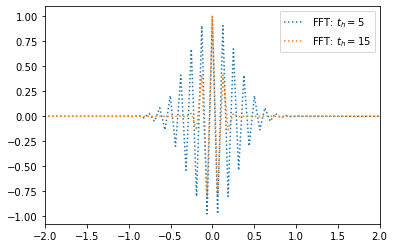

In [3]:
# plots
dt = 1e-3
t = np.arange(-50,50, dt)


# fourier transforms
# numpy.fft.fft(g) * dt
t_h = 5
fft1 = np.fft.fft(g_t_anal(t,t_h)) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )
plt.plot(2*np.pi *f_axis1, np.real(fft1), linestyle = ':', label='FFT: $t_h = 5$')
#plt.plot(np.imag(f_axis1), fft1, label='Imaginary: $t_h = 5$')
plt.legend()
plt.xlim(-2,2)
#plt.show()

t_h = 15
fft2 = np.fft.fft(g_t_anal(t,t_h)) * dt
fft2 = np.fft.fftshift(fft2)
f_axis2 = np.fft.fftshift( np.fft.fftfreq(len(fft2), dt) )
plt.plot(2*np.pi*f_axis2, np.real(fft2), linestyle =':', label='FFT: $t_h = 15$')
#plt.plot(np.imag(f_axis2), fft2, label='Imaginary: $t_h = 15$')
plt.xlim(-2,2)
plt.legend()

Comment on the effect of filtering a general input time function  𝑓(𝑡)
  by  𝑔(𝑡)
  (i.e. convolution of  𝑓(𝑡)
  with  𝑔(𝑡)
 ), and explain the difference in filtered output after applying Gaussian functions with  𝑡𝐻=5
  or  15
  secs.

Comment on how this is related to the time-frequency uncertainty principle (a signal cannot be infinitesimally sharp both in time and frequency)

# Comments:

Using g(t) as a filter will capture a central trend, and filter out effects from outside the window in both domains. 





# Fourier transform of Window Functions (6 pts)

A continuous time signal $f(t)$ can be truncated into a signal of finite length
$T$ by window functions $b(t)$:

$$ g(t) = f(t) b(t) $$

Typical window functions include:

 * Boxcar function
    $$b(t) =
    \begin{cases}
    1 & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$
 * Hann window
    $$b(t) =
    \begin{cases}
    \frac{1}{2} \left( 1 - \cos \frac{2 \pi t}{T} \right) & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$

Now let $T = 10$ seconds, and sample both window functions by $\Delta t = 0.01$ seconds:

 1. Plot both window functions on the same graph.
 2. Calculate the Fourier transform of both functions by numpy `fft()`. Pay extra attention to
    how you interpret the corresponding frequencies of output results from python.
    (_Hint_: `fftshift()` may be useful. Also pay attention to the length of the input signal
    (> 10 sec), as it dictates the frequency resolution for the spectrum.)
 3. Plot the Fourier transform of both functions in the appropriate frequency range on the
    same graph.
 4. Based on the FTs, comment on the effect of truncating a continuous time series by either
    window on its frequency spectrum $G(\omega)$ compared to the original spectrum $F(\omega)$.
 5. Speculate on the advantages and disadvantages of boxcar and Hann window functions for truncation.

In [4]:
# functions for windows 

def get_boxcar(T, t,):
    
    dt = t[1] - t[0]
    
    # calculate size
    
    boxcar = np.zeros(len(t))
    
    start = np.argmin(np.abs(t-0))
    stop = np.argmin(np.abs(t-T))
    
    ones = np.ones(len(t))
    
    boxcar[start:stop] = ones[start:stop]
    
    return boxcar


def get_Hann(T,t):
    
    dt = t[1] - t[0]
    
    hann_data = 0.5*(1-np.cos(2*np.pi*t/T))
    
    hann_zeros = np.zeros(len(t))
    
    start = np.argmin(np.abs(t-0))
    stop = np.argmin(np.abs(t-T))
    
    hann_zeros[start:stop] = hann_data[start:stop]
    
    return hann_zeros
    
    
    
    

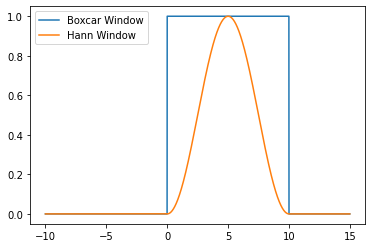

In [5]:
# plots of windows
t = np.arange(-10,15, 0.01)
T = 10 
boxcar =  get_boxcar(T, t,)

hann = get_Hann(T,t)

plt.plot(t, boxcar,label='Boxcar Window')
plt.plot(t,hann, label='Hann Window')
plt.legend()

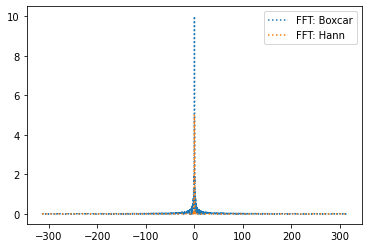

In [6]:
# fft and plot

dt = 0.01

fft1 = np.fft.fft(boxcar) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )
plt.plot(2*np.pi *f_axis1, np.abs(fft1), linestyle = ':', label='FFT: Boxcar')

fft1 = np.fft.fft(hann) * dt
fft1 = np.fft.fftshift(fft1)
f_axis1 = np.fft.fftshift( np.fft.fftfreq(len(fft1), dt) )
plt.plot(2*np.pi *f_axis1, np.abs(fft1), linestyle = ':', label='FFT: Hann')

plt.legend()


 The FT of both windows are Dirac delta funtions. 
 
 The Boxcar function is not cotinous, and the Gibbs phenomion will be present. 
 
 The Hann function is continous so it does not have the the Gibbs phenomion. 
 
 The main advantages of the Hann window are the continous nature of the window, and trimming out of the edges which is typically advantagoius if we know a centraly located signal. 
 
 The main advantage of the boxcar is that it gives equal weight to the entire window, which is idea for some proccesses IE SNR peak finding over various time scales


# Radial Distribution Function (12 pts)

**Background**

Liquids have no fixed internal structure. Yet they do have some short range order in the sense
that they have preferred intermolecular spacings, which are determined by the locations of minima
in the intermolecular potentials. The microscopic structure of liquids is often characterized by a
quantity known as the Radial Distribution Function $g(r)$, which is essentially the probability (Relative
to the average probability, which means that $g(r)$ tends to 1 at large $r$, where the neighbour is too far
away to feel any interaction.) that a molecule has a neighbouring molecule at distance $r$. Typically $g(r)$
shows a value that approaches zero at small $r$ since molecules cannot occupy the same space; it also shows a
peak at the preferred distance of nearest neighbours, and secondary peaks at preferred distances of more distant
neighbours. If a suitable collimated beam of particles (e.g. X-rays or neutrons) is sent through a
sample of the liquid, some of the particles are scattered. The number of particles scattered through
a given angle is related to the Fourier Transform of $g(r)$ evaluated at the wavenumber $k$
corresponding to the transverse momentum transfer associated with that scattering angle. Kittel derives
this relationship in Chapter 17 of Introduction to Solid State Physics.

If this all sounds complicated, all you need to know here is that something called the Structure
Factor $S(k)$ is effectively measured by looking at the scattered intensity as a function of
scattering transverse wavenumber $k$ (proportional to scattering angle), and that the Radial Distribution
Function is related to it by

$$ g(r) = 1 + \frac{1}{2 \pi^2 \rho r} \int_0^\infty k \left( S(k) - 1 \right) \sin(kr) dk $$

where $\rho$ is liquid number density (number of atoms per unit volume, computable from the three
constants mentioned in the introduction), $k$ is wavenumber, and $r$ is radius.

 1. You may have noticed some resemblance between expression (6) and the Fourier transform.
    First show that the integration part $\int_0^\infty k (S(k) - 1) \sin(kr) dk$
    can be rewritten as

    $$p(r) = \int_{-\infty}^\infty \frac{1}{2i} k \left( S(k) - 1 \right) e^{ikr} dk.$$
    
    __Hint__: The structure factor S(k) is even, since there should be no reason why scattering intensity would be different for one direction (+k) compared to its opposite (−k). Using the fact that S(k) is even may be useful.  

 2. Now we can make some connections between the Radial Transfer Function and the Fourier
    Transform, if we substitute $r \rightarrow t$ and $k \rightarrow \omega$. What is the Fourier transform
    $P(k)$ of $p(r)$? Is $P(k)$ a real, imaginary or general complex function? Is it even or odd? How will these
    affect $p(r)$? Is that what you expect? Plot $P(k)$ as a function of $k$ ranging from $-15\mathrm{\mathring{A}}^{-1}$ to $15\mathrm{\mathring{A}}^{-1}$
    based on `argon.py` (i.e. import and use the variables defined there).
    
    __Hint__: In constructing $S(k)$ from `argon.py`, you should make an "even" array twice the length (minus 1) of YanData. 
    YanData represents the structure factor (i.e. $S(k)$) for argon sampled at the $dk$ defined in the `argon.py` file. 
	It's specifically $S(k)$ sampled from `k = 0` to `k = len(YanData) * dk`, so create an even function out to the same length in the negative direction (i.e. the "k-axis" it's sampled on would be `-(len(YanData)-1)*dk,  ... 0, ..., + (len(YanData)-1)*dk`).

 3. Write a Python function `[gn, rn] = RDFcalc(S, dk, rho)` to calculate Radial Distribution
    Function $g(r)$ from Structure Factor $S(k)$ data, sampled at $dk$, and density $\rho$, and output
    the RDF vector $g_n$ and its corresponding radial distance vector $r_n$.

    __Hint__: for Python `fft()` and `ifft()` functions, realize that the values of the Fourier Transform
    corresponding to negative frequencies are stored in the second half of the arrays given to
    (`ifft`) or obtained from it (`fft`). You also have to study the difference between the DFT and
    FT to multiply the right factors.
 4. With the data provided in `argon.py`, compute the corresponding Radial Distribution Function
    $g(r)$. Plot your results for $r$ from $0$ to $30\mathrm{\mathring{A}}$;. Over what range of radius can you trust your
    result?

    __Hint__: To check if your results make sense, recall that $g(r)$ is related to the probability that a
    molecule has a neighbouring molecule at distance $r$, therefore, should be close to $0$
    when $r \rightarrow 0$, i.e. two molecules can not occupy the same space, and you can
    set $g(r = 0) = 0$. Recall $\lim_{r\rightarrow\infty}g(r)=1$. Also note the unit $\rho$ used in $g(r)$ formula (6).

 5. From the $g(r)$ you computed, estimate the average molecular radius $R_a$ of liquid argon. Give
    your reasoning and state what accuracy you can justify for your estimation.
 6. Now we explore the effect of sampling range. Yan sampled in wavenumber $k$ out to
    $k_{max} = 15.24\mathrm{\mathring{A}}^{-1}$, and he could have saved himself work by not collecting as much data,
    i.e., reducing $k_{max}$. But how much could he have reduced the sampling length $k_{max}$, while still
    seeing distinct peaks in the Radial Distribution Function? Also explain theoretically what you observe.

    __Hint__: Plot on top of the $g(r)$ obtained in Part 4, the $g(r)$'s you compute for a series of
    $k_{max}$ values. You can try half $k_{max}$ each time to look for changes. For the theoretical explanations
    for part 6 and 7, realize the interchangability of $t \leftrightarrow \omega$ ($r \leftrightarrow k$).

 7. To explore the effect of data sampling, let's assume Yan decided to save his work by sampling
    less often (i.e. increasing $dk$). How large a $dk$ can he use to be able to still recover the first
    two peaks clearly? State your answers and a theoretical justification for what you expect to
    see if you increase $dk$ too much.

    __Hint__: Plot on top of the $g(r)$ obtained from `argon.py` data, the $g(r)$'s you obtain when
    you subsample the same dataset. Try doubling $dk$ each time to observe the effect of coarser
    sampling.

# 3 Solution

In [7]:
from argon import *

# the structure factor data for Argon
'''
YanData = np.array([
dk = 0.12                 # inverse Angstroms
massRho = 1.4273          # grams/cc 
molWeight = 39.948        # grams/mol
Navogadro = 6.0221367e23  # atoms/mol
'''

'\nYanData = np.array([\ndk = 0.12                 # inverse Angstroms\nmassRho = 1.4273          # grams/cc \nmolWeight = 39.948        # grams/mol\nNavogadro = 6.0221367e23  # atoms/mol\n'

1.

2. Now we can make some connections between the Radial Transfer Function and the Fourier
    Transform, if we substitute $r \rightarrow t$ and $k \rightarrow \omega$. What is the Fourier transform
    $P(k)$ of $p(r)$? Is $P(k)$ a real, imaginary or general complex function? Is it even or odd? How will these
    affect $p(r)$? Is that what you expect? Plot $P(k)$ as a function of $k$ ranging from $-15\mathrm{\mathring{A}}^{-1}$ to $15\mathrm{\mathring{A}}^{-1}$
    based on `argon.py` (i.e. import and use the variables defined there).
    
    __Hint__: In constructing $S(k)$ from `argon.py`, you should make an "even" array twice the length (minus 1) of YanData. 
    YanData represents the structure factor (i.e. $S(k)$) for argon sampled at the $dk$ defined in the `argon.py` file. 
	It's specifically $S(k)$ sampled from `k = 0` to `k = len(YanData) * dk`, so create an even function out to the same length in the negative direction (i.e. the "k-axis" it's sampled on would be `-(len(YanData)-1)*dk,  ... 0, ..., + (len(YanData)-1)*dk`).


2. 

P(k) being imaginary, real, general complex, even or odd depends on p(r). 

We kow from lecture that the FT (Fourier Transform):
* real even => real even
* imaginary even => imaginary even
* real odd => imaginary odd
* imaginary odd => real odd

so for example, general real function becomes a real even + imaginary odd function. 

from looking at p(r), we can see that it is a real odd function. We therefore expect the FT of to be imaginary odd.


In [8]:
# produce s_k array
s_k = np.concatenate((np.zeros((len(YanData)-1)), YanData))
YanData_inverse = YanData[::-1]
s_k[0:len(YanData-1)] = YanData_inverse

# do function bits from -15 to 15 (1/astrom)
k = np.linspace(-15,15, len(s_k))
j = complex(0,1)

# we can rewrite p(r) into p(k) by reconizing the function as a FT, and then adding a factor of 2 pi
p_k = k*(s_k -1) * 1/(2*j) * 2 *np.pi

p_k_new = j * np.pi * k *(1-s_k), # we could 'simplify' to that as well

Text(3, 7.5, 'The Real Componet of P(k)\nis all zeros as expected')

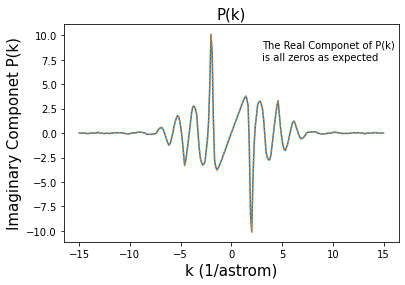

In [9]:
plt.title('P(k)', size=15)
plt.plot(k, np.imag(p_k))
plt.xlabel('k (1/astrom)', size=15)
plt.ylabel('Imaginary Componet P(k)', size=15)
plt.plot(k, np.imag(p_k), ':')
plt.text(3, 7.5, 'The Real Componet of P(k)\nis all zeros as expected')

 3. Write a Python function `[gn, rn] = RDFcalc(S, dk, rho)` to calculate Radial Distribution
    Function $g(r)$ from Structure Factor $S(k)$ data, sampled at $dk$, and density $\rho$, and output
    the RDF vector $g_n$ and its corresponding radial distance vector $r_n$.

    __Hint__: for Python `fft()` and `ifft()` functions, realize that the values of the Fourier Transform
    corresponding to negative frequencies are stored in the second half of the arrays given to
    (`ifft`) or obtained from it (`fft`). You also have to study the difference between the DFT and
    FT to multiply the right factors.
    
 4. With the data provided in `argon.py`, compute the corresponding Radial Distribution Function
    $g(r)$. Plot your results for $r$ from $0$ to $30\mathrm{\mathring{A}}$;. Over what range of radius can you trust your
    result?

    __Hint__: To check if your results make sense, recall that $g(r)$ is related to the probability that a
    molecule has a neighbouring molecule at distance $r$, therefore, should be close to $0$
    when $r \rightarrow 0$, i.e. two molecules can not occupy the same space, and you can
    set $g(r = 0) = 0$. Recall $\lim_{r\rightarrow\infty}g(r)=1$. Also note the unit $\rho$ used in $g(r)$ formula (6).


In [10]:
# calculate rho
rho = (massRho  / molWeight) * Navogadro * 1e-24 # particles per cubic anstrom

$$ g(r) = 1 + \frac{1}{2 \pi^2 \rho r} \int_0^\infty k \left( S(k) - 1 \right) \sin(kr) dk $$


In [11]:
def RDFcalc(S, dk, rho, k_=k):
    '''calculates Radial Distribution
    Function $g(r)$ from Structure Factor $S(k)$ data, sampled at $dk$, and density $\rho$, and output
    the RDF vector $g_n$ and its corresponding radial distance vector $r_n$.'''
    
    # to get r array we compute inverse fft of P(k) => p(r)
    # then we use numpy function to get correpsonding axis of r
    
    # assume S is symetric 
    
    # we are asumming k ranges from -15, 15

    # This should be an input! 
    
    s_k = S
    j = complex(0,1)
    #print(len(k_), len(s_k))
    p_k = k_*(s_k -1) * 1/(2*j) * 2 *np.pi

    

    T = len(S)*dk
    r = np.arange(0,T,dk)
    
    ifft_p_k = np.fft.ifft(np.fft.ifftshift(p_k))
    
   # ifft_p_k = np.fft.ifft((p_k))

    #ifft_p_k = np.fft.fftshift(np.fft.ifft(p_k))
    
  #  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)

    ifft_p_k = np.fft.ifft(np.fft.ifftshift(p_k))

    gn = np.empty(len(r))
    start_k = np.argmin(np.abs(k))
    
    gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
    print('These warnings come from calculating gn[0], we hard set that value after so dw fam')

   
    rn=r
    gn[0] = 0
    
    return [gn, rn]

These warnings come from calculating gn[0], we hard set that value after so dw fam


/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: divide by zero encountered in true_divide
  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: invalid value encountered in multiply
  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


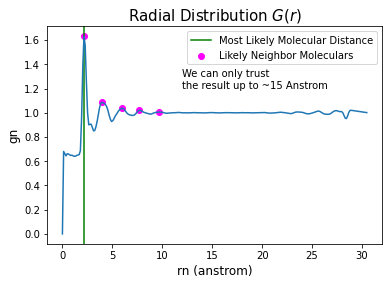

In [18]:
gn, rn = RDFcalc(s_k, dk, rho)
plt.figure(figsize=(6,4))

plt.xlabel('rn (anstrom)', size=12)
plt.ylabel('gn', size=12)
plt.title('Radial Distribution $G(r)$', size=15)
plt.text(12, 1.2, 'We can only trust\nthe result up to ~15 Anstrom')
#plt.axvline(7.478939103285808, color='k', label='Mean Molecular Distance')
plt.axvline(rn[np.argmax(np.real(gn))], color='green', label='Most Likely Molecular Distance') 
plt.plot(rn, np.real(gn))
plt.scatter(rn[peaks],gn[peaks], color='magenta', label='Likely Neighbor Moleculars')
plt.legend()

We can trust the plot up until it starts getting wavy at the end, but I'm more conservative on trust so im gonna say 15

5. From the $g(r)$ you computed, estimate the average molecular radius $R_a$ of liquid argon. Give
    your reasoning and state what accuracy you can justify for your estimation.
    
Answer: The peak in the plot of $g(r)$ corresponding to the most likely position of $R_a$ for liquied argon. The plot is showing the relative probabililties: however, the mean (average) molecurlar distance will be the mean of the weighted distrubution $g(r) * r$* taken from $r=0$ to $r=15$ where 15 is the point where we no longer trust the computed $g(r)$ due to the egde artifacts of a ft, and ift. The assocaited error in this distance can be estimated as the np.std of the weighted distrubution!

This of course is wrong! as $g(r)$ itself isn't aware if there are particles closer or further away. :((

*You might ask "hey! you forgot to normalize by the sum of $g(r)$, recall that $g(r)$ itself is the relative probablilty - as such it does not need to be normalized

Instead, lets recall that $g(r)$ "hows a
peak at the preferred distance of nearest neighbours, and secondary peaks at preferred distances of more distant
neighbours." We can locate the neighbors of 1 particel and then compute the average and std of these distances as the average molecular distance. 


In [16]:
from scipy.signal import find_peaks

In [25]:
np.mean(distance)

1.8899999999999997

Results from the wrong method
7.478939103285808 4.406378014842057
These warnings come from calculating gn[0], we hard set that value after so dw fam


/home/afinemax/anaconda3/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: divide by zero encountered in true_divide
  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: invalid value encountered in multiply
  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(15, 0.4, 'Averge Mol Distance\nis $1.89 \\pm 0.15$ anstrom')

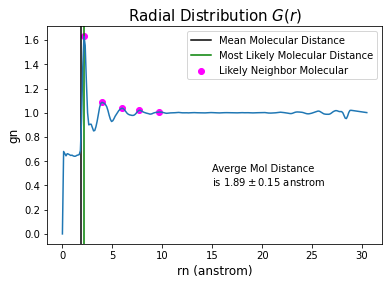

In [30]:
# wrong calculation
# take g_r up until r=15
weights = gn[rn<=15] * rn[rn<=15]
mean_distance = np.mean(np.real(weights)) 
print('Results from the wrong method')
print(mean_distance, np.std(np.real(weights)))


# New idea
peaks = find_peaks(gn)[0]

# filter peaks, we now the first distance 

peaks = peaks[peaks>8]
peaks = peaks[peaks<90]

# we have one that is at a trough
peaks = np.delete(peaks, [1])
mole_distances = rn[peaks]
distance = []

for i in range(len(mole_distances)-1):
    distance.append(mole_distances[i+1] - mole_distances[i])
    


mean_distance = np.mean(np.asarray(distance))
mole_std = np.std(np.asarray(distance))

gn, rn = RDFcalc(s_k, dk, rho)
plt.figure(figsize=(6,4))

plt.xlabel('rn (anstrom)', size=12)
plt.ylabel('gn', size=12)
plt.title('Radial Distribution $G(r)$', size=15)
#plt.text(12, 1.2, 'We can only trust\nthe result up to ~15 Anstrom')
plt.axvline(mean_distance, color='k', label='Mean Molecular Distance')
plt.axvline(rn[np.argmax(np.real(gn))], color='green', label='Most Likely Molecular Distance') 
plt.plot(rn, np.real(gn))
plt.scatter(rn[peaks],gn[peaks], color='magenta', label='Likely Neighbor Molecular')
plt.legend()
#
plt.text(15, 0.4, 'Averge Mol Distance\nis $1.89 \pm 0.15$ anstrom')
#print(mean_distance, mole_std)

 6. Now we explore the effect of sampling range. Yan sampled in wavenumber $k$ out to
    $k_{max} = 15.24\mathrm{\mathring{A}}^{-1}$, and he could have saved himself work by not collecting as much data,
    i.e., reducing $k_{max}$. But how much could he have reduced the sampling length $k_{max}$, while still
    seeing distinct peaks in the Radial Distribution Function? Also explain theoretically what you observe.

    __Hint__: Plot on top of the $g(r)$ obtained in Part 4, the $g(r)$'s you compute for a series of
    $k_{max}$ values. You can try half $k_{max}$ each time to look for changes. For the theoretical explanations
    for part 6 and 7, realize the interchangability of $t \leftrightarrow \omega$ ($r \leftrightarrow k$).

 7. To explore the effect of data sampling, let's assume Yan decided to save his work by sampling
    less often (i.e. increasing $dk$). How large a $dk$ can he use to be able to still recover the first
    two peaks clearly? State your answers and a theoretical justification for what you expect to
    see if you increase $dk$ too much.

    __Hint__: Plot on top of the $g(r)$ obtained from `argon.py` data, the $g(r)$'s you obtain when
    you subsample the same dataset. Try doubling $dk$ each time to observe the effect of coarser
    sampling.

These warnings come from calculating gn[0], we hard set that value after so dw fam
These warnings come from calculating gn[0], we hard set that value after so dw fam
These warnings come from calculating gn[0], we hard set that value after so dw fam
These warnings come from calculating gn[0], we hard set that value after so dw fam
These warnings come from calculating gn[0], we hard set that value after so dw fam


/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: divide by zero encountered in true_divide
  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: invalid value encountered in multiply
  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
/home/afinemax/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: divide by zero encountered in true_divide
  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: invalid value encountered in multiply
  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: divide by zero encountered in true_divide
  gn = 1 + (1/(2*np.pi**2 *rho *r)) *(ifft_p_k)
/tmp/ipykernel_8603/239233574.py:38: RuntimeWarning: invalid value encountered in multiply
 

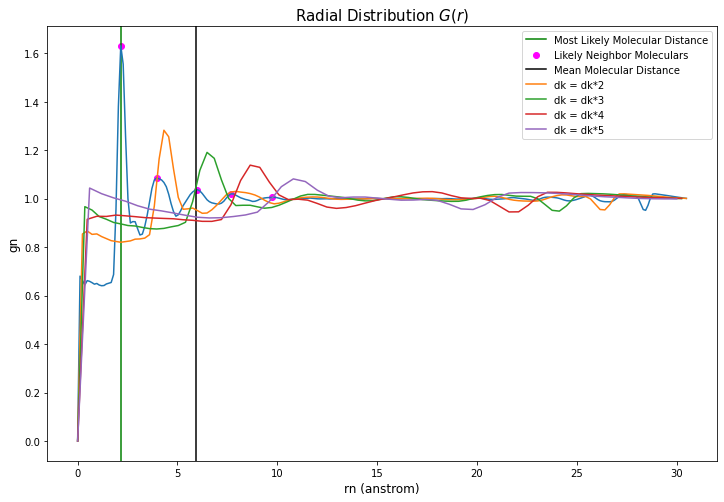

In [19]:
gn_knot, rn_knot = RDFcalc(s_k, dk, rho)
plt.figure(figsize=(12,8))

plt.xlabel('rn (anstrom)', size=12)
plt.ylabel('gn', size=12)
plt.title('Radial Distribution $G(r)$', size=15)
#plt.text(12, 1.2, 'We can only trust\nthe result up to ~15 Anstrom')
#plt.axvline(7.478939103285808, color='k', label='Mean Molecular Distance')
plt.axvline(rn_knot[np.argmax(np.real(gn_knot))], color='green', label='Most Likely Molecular Distance') 
plt.plot(rn_knot, np.real(gn_knot))
plt.scatter(rn_knot[peaks],gn_knot[peaks], color='magenta', label='Likely Neighbor Moleculars')
plt.axvline(mean_distance, color='k', label='Mean Molecular Distance')


# lets add some lines
for i in range(4,):
    i += 2
    gn, rn = RDFcalc(s_k[::i], dk*i, rho, k_=k[::i])
    plt.plot(rn, np.real(gn), label='dk = dk*' + str(i))
    
plt.legend()

I'm gonna say I only see two peaks in green line so dk=3*dk (we use compsci language here). 

As we increase dk, we expect the resolution of the plot to go down. 

255